# 演習課題5回目

11月24日(金)

csvファイル (data_for_regression.csv) のデータを回帰することを考える．
最初の50個を訓練データ，残りをテストデータとして3次多項式で回帰を行い，係数と切片，決定係数(訓練とテストの両方)を出力せよ．
さらに，データの散布図と予測曲線を描画せよ．

## セットアップ

In [1]:
# Pythonが実行時のバージョンを満たしているか確認する
import sys
assert sys.version_info >= (3, 9, 7)

# 必要なモジュールのインポート
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

# サードパーティ製ライブラリが実行時のバージョンを満たしているか確認する
assert np.__version__ >= '1.20.3'
assert pd.__version__ >= '1.3'
assert sklearn.__version__ >= '0.24'

# データの保存場所の定義
DATA_ROOT_PATH = Path('data', '7')

# matplotlib の日本語対応
plt.rcParams['font.family'] = "MS Gothic"


## データの取得

In [2]:
data = pd.read_csv(DATA_ROOT_PATH / 'data_for_regression.csv').to_numpy()
data[:5]


array([[ -0.43 ,  -6.68 ],
       [  0.805,  -2.52 ],
       [ -1.67 , -39.9  ],
       [  1.74 ,  26.8  ],
       [  1.2  ,  10.2  ]])

In [3]:
# データを訓練セットとテストセットに分割
data_train, data_test = data[:50], data[50:]
X_train, y_train = data_train[:, 0].reshape(-1, 1), data_train[:, 1]
X_test, y_test = data_test[:, 0].reshape(-1, 1), data_test[:, 1]


## 多項式回帰の実装

In [4]:
X_train[:5]


array([[-0.43 ],
       [ 0.805],
       [-1.67 ],
       [ 1.74 ],
       [ 1.2  ]])

In [5]:
# 3次までの新特徴量を追加
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_train_poly[:5]


array([[ 1.        , -0.43      ,  0.1849    , -0.079507  ],
       [ 1.        ,  0.805     ,  0.648025  ,  0.52166013],
       [ 1.        , -1.67      ,  2.7889    , -4.657463  ],
       [ 1.        ,  1.74      ,  3.0276    ,  5.268024  ],
       [ 1.        ,  1.2       ,  1.44      ,  1.728     ]])

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)


LinearRegression()

訓練データによるモデルの係数と切片は次のようにして求まる

In [7]:
print(f"係数: {lin_reg.coef_}")
print(f"切片: {lin_reg.intercept_}")


係数: [ 0.          6.29180878 -2.1012491   4.06420399]
切片: -1.6511903888721


訓練データの決定係数とテストデータの決定係数は，それぞれ次のようにして求まる．

In [8]:
X_test_poly = poly_features.fit_transform(X_test)

r2_train = lin_reg.score(X_train_poly, y_train)
r2_test = lin_reg.score(X_test_poly, y_test)
print(f"訓練データの決定係数: {r2_train}")
print(f"テストデータの決定係数: {r2_test}")


訓練データの決定係数: 0.9473122128594194
テストデータの決定係数: 0.9254636935697027


## データの散布図と予測曲線

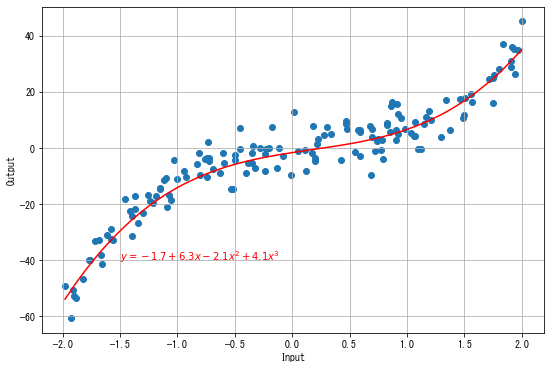

In [10]:
# 線形モデルによる予測値を格納
y_pred = lin_reg.predict(X_test_poly)

# データと予測曲線をプロット
fig, ax = plt.subplots(figsize=(9, 6))
curve_clr = 'r'
ax.scatter(X_test, y_test)
ax.plot(np.sort(X_test, axis=0), np.sort(y_pred), c=curve_clr)
ax.grid(True)
ax.set_xlabel('Input')
ax.set_ylabel('Output')
ax.text(-1.5, -40, r"$y = -1.7 + 6.3x - 2.1x^2 + 4.1x^3$", c=curve_clr)
plt.show()
